# Expdataanalysis (EDA lib)

## Imports

In [1]:
import expdataanalysis as eda
import pandas as pd

## Считывание файла и работа с памятью

### *eda.read_file(path, type_file="", optimization=False, **kwargs)*

Функция read_file используется для чтения файла в зависимости от его формата. На данный момент поддерживаются форматы csv и json.
* path - путь к файлу
* typefile - можно указать заранее тип файла (например, csv, json), чтобы не ориентироваться на расширение файла
* optimization - позволяет по умолчанию выполнить оптимизацию файла в памяти
* \*\*kwargs - передача специальных аргументов для функции чтения файла (например, *delimeter*, *index_col*)

При успешном определении типа файла либо при заданном типе файла функция возвращает датафрейм.

In [2]:
house_df = eda.read_file('kc_house_data.csv', type_file="csv", optimization=True)
json_df = eda.read_file("Config", "json")
titanic_df = eda.read_file("train_titanic.csv")
apple_df = eda.read_file('apple.csv', index_col='Date', parse_dates=True)

reading csv file...
reading json file...
reading csv file...
reading csv file...


### *eda.get_mem_usage(df, print_inf = False)*

Функция get_mem_usage предоставляет информацию о размере датафрейма (в МБ)
* df - датафрейм, для которого требуется узнать информацию о размере
* print_inf - параметр, в зависимости от которого происходит или не происходит вывод через Print

Функция возвращает размер датафрейма

In [23]:
eda.get_mem_usage(titanic_df)

0.081695556640625

In [24]:
eda.get_mem_usage(house_df, print_inf=True)

Memory usage of dataframe is 3.46 MB


3.4628982543945312

### *eda.optimize_mem_usage(df, use_float16=False, print_inf = False)*

Функция optimize_mem_usage используется для оптимизации используемой датафреймом памяти
* df - оптимизируемый датафрейм
* use_float16 - позволяет использовать или не использовать float16, по умолчанию не используется
* print_inf - параметр, в зависимости от которого происходит или не происходит вывод через Print

Функция возвращает оптимизированный датафрейм

In [28]:
house_df = eda.optimize_mem_usage(house_df, print_inf=True)

Memory usage of dataframe is 1.23 MB
Memory usage after optimization is: 1.23 MB
Decreased by 0.0%


## Информация о данных

### *eda.missing_data(df)*

Функция missing_data вычисляет и выводит количество пропусков в данных по каждому полю данных датафрейма
* df - исследуемый датафрейм

Функция выводит информацию о пропусках в данных

In [13]:
eda.missing_data(titanic_df)

PassengerId: 0/891 (0%)
Survived: 0/891 (0%)
Pclass: 0/891 (0%)
Name: 0/891 (0%)
Sex: 0/891 (0%)
Age: 177/891 (19%)
SibSp: 0/891 (0%)
Parch: 0/891 (0%)
Ticket: 0/891 (0%)
Fare: 0/891 (0%)
Cabin: 687/891 (77%)
Embarked: 2/891 (0%)


### *eda.count_types(df)*

Функция count_types позволяет узнать, сколько данных и какого типа в датафрейме
* df - исследуемый датафрейм

Функция выводит информацию о количестве данных каждого типа, суммарную информацию, и полное количество данных

In [3]:
eda.count_types(titanic_df)

Every column:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-----
Summary:
object     5
int64      5
float64    2
dtype: int64
-----
All data:
{'int64': 4455, 'str': 3766, 'float64': 1782, 'float': 689}


### *eda.get_description(df)*

Функция get_description позволяет получить базовые стохастические характеристики (наибольшее, наименьшее, среднее, мода, медиана, ско)
* df - исследуемый датафрейм

Функция возвращает датафрейм с полученными характеристиками 

In [5]:
eda.get_description(titanic_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
mode,1.000000,0.000000,3.000000,24.000000,0.000000,0.000000,8.050000
median,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


### eda.get_group_description(df, gb_column)

Функция get_groip_description позволяет получить базовые стохастические характеристики (наибольшее, наименьшее, среднее, мода, медиана, ско) после группировки данных по определенному полю
* df - исследуемый датафрейм
* gb_column - поле для группировки

Функция выводит базовые характеристики каждого поля после группировки

In [3]:
eda.get_group_description(titanic_df, 'Survived')

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                             
            max mode median  
Survived                     
0         891.0    1  455.0  
1         890.0    2  439.5

Pclass                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0    3      3
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0    1      2

Name                                         
         count unique                          top freq
Survived                                               
0          549    549          Svensson, Mr. Johan    1
1          342    342  Nakid, Miss. Maria ("Mary")    1

Sex                    
         count unique     top freq
Survived                          
0          549      2    male  468
1          342      2  female  233

Age                                                            \
          count       mean        std   min   25%   50%   75%   max  mode   
Survived                                                                    
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  21.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  24.0   

                 
         median  
Survived         
0          28.0  
1          28.0

SibSp                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0    0      0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0    0      0

Parch                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0    0      0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0    0      0

Ticket                      
          count unique       top freq
Survived                             
0           549    470  CA. 2343    7
1           342    260      1601    5

Fare                                                            \
          count       mean        std  min      25%   50%   75%       max   
Survived                                                                    
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000   
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292   

                        
           mode median  
Survived                
0          8.05   10.5  
1         13.00   26.0

Cabin                     
         count unique      top freq
Survived                           
0           68     62      D26    2
1          136    101  B96 B98    4

Embarked                
            count unique top freq
Survived                         
0             549      3   S  427
1             340      3   S  217

In [8]:
#apple_df = apple_df.sort_index()
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-02-22 to 2012-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 108.8 KB


In [11]:
eda.get_corr_matrix(titanic_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


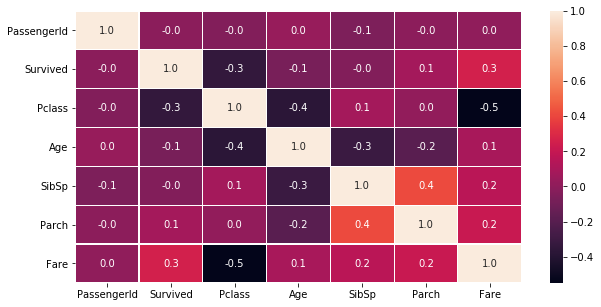

In [6]:
eda.plot_corr_matrix(titanic_df)

In [7]:
eda.count_types(titanic_df)

{'int16': 891, 'int8': 3564, 'str': 3766, 'float16': 1782, 'float': 689}


In [14]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
